In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("credit_risk.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.isna().sum()/len(df)

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [4]:
len(df)

614

In [7]:
data=df.dropna()

In [8]:
len(data)

480

# Exploratory Data Analysis

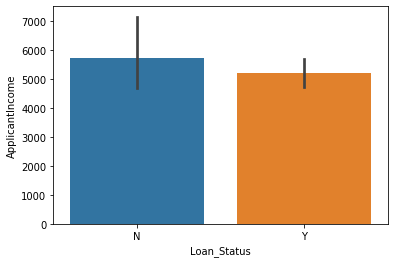

In [10]:
#1: Applicant and coapplicant 
sns.barplot(x='Loan_Status',y='ApplicantIncome',data=data)

In [15]:
data.groupby(['Property_Area','Loan_Status'])['Loan_Status'].count()

Property_Area  Loan_Status
Rural          N               54
               Y               85
Semiurban      N               42
               Y              149
Urban          N               52
               Y               98
Name: Loan_Status, dtype: int64

In [17]:
data.groupby(['Property_Area','Loan_Status'])['Loan_Status'].count()\
        /data.groupby(['Property_Area'])['Loan_Status'].count()

Property_Area  Loan_Status
Rural          N              0.388489
               Y              0.611511
Semiurban      N              0.219895
               Y              0.780105
Urban          N              0.346667
               Y              0.653333
Name: Loan_Status, dtype: float64

In [18]:
data.groupby(['Credit_History','Loan_Status'])['Loan_Status'].count()\
        /data.groupby(['Credit_History'])['Loan_Status'].count()

Credit_History  Loan_Status
0.0             N              0.900000
                Y              0.100000
1.0             N              0.207317
                Y              0.792683
Name: Loan_Status, dtype: float64

In [21]:
data.Loan_Amount_Term.value_counts()/len(data.Loan_Amount_Term)

360.0    0.856250
180.0    0.075000
480.0    0.025000
300.0    0.018750
84.0     0.006250
120.0    0.006250
36.0     0.004167
240.0    0.004167
60.0     0.004167
Name: Loan_Amount_Term, dtype: float64

In [22]:
data.groupby(['Married','Loan_Status'])['Loan_Status'].count()\
        /data.groupby(['Married'])['Loan_Status'].count()

Married  Loan_Status
No       N              0.378698
         Y              0.621302
Yes      N              0.270096
         Y              0.729904
Name: Loan_Status, dtype: float64

In [23]:
data.groupby(['Education','Loan_Status'])['Loan_Status'].count()\
        /data.groupby(['Education'])['Loan_Status'].count()

Education     Loan_Status
Graduate      N              0.292428
              Y              0.707572
Not Graduate  N              0.371134
              Y              0.628866
Name: Loan_Status, dtype: float64

In [25]:
output=data[data.CoapplicantIncome==0].groupby(['Married','Loan_Status'])['Loan_Status'].count()\
        /data[data.CoapplicantIncome==0].groupby(['Married'])['Loan_Status'].count()

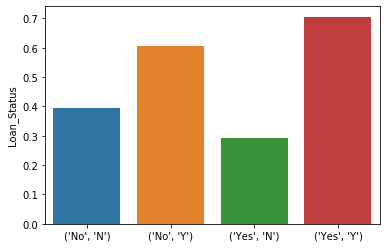

In [29]:
sns.barplot(output.index,output)

In [36]:
data.groupby(['Education','Self_Employed'])['Loan_ID'].count()\
        /data.groupby(['Education'])['Loan_ID'].count()

Education     Self_Employed
Graduate      No               0.861619
              Yes              0.138381
Not Graduate  No               0.865979
              Yes              0.134021
Name: Loan_ID, dtype: float64

In [33]:
data.groupby(['Education','Self_Employed'])['Loan_ID'].count()\


Education     Self_Employed
Graduate      No               330
              Yes               53
Not Graduate  No                84
              Yes               13
Name: Loan_ID, dtype: int64

In [38]:
data[(data.Dependents.isin(["2","3+"]))&(data.Gender=="Male")]\
                .Loan_Amount_Term.mean()

334.90909090909093

In [46]:
data[(data.Dependents.isin(["0","1"]))&(data.Gender=="Male")]\
                .Loan_Amount_Term.mean()

341.31868131868134

In [47]:
data[(data.Dependents.isin(["2","3+"]))&(data.Gender=="Female")]\
                .Loan_Amount_Term.mean()

384.0

In [48]:
data[(data.Dependents.isin(["1","0"]))&(data.Gender=="Female")]\
                .Loan_Amount_Term.mean()

352.5925925925926

In [49]:
data.groupby(['Gender','Married','Property_Area',"Loan_Status"])['Loan_ID'].count()\
        /data.groupby(['Gender','Married','Property_Area'])['Loan_ID'].count()

Gender  Married  Property_Area  Loan_Status
Female  No       Rural          N              0.375000
                                Y              0.625000
                 Semiurban      N              0.413793
                                Y              0.586207
                 Urban          N              0.375000
                                Y              0.625000
        Yes      Rural          N              0.750000
                                Y              0.250000
                 Semiurban      N              0.066667
                                Y              0.933333
                 Urban          N              0.666667
                                Y              0.333333
Male    No       Rural          N              0.405405
                                Y              0.594595
                 Semiurban      N              0.216216
                                Y              0.783784
                 Urban          N              0.500000
    

# Data Prep

In [51]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [61]:
data.Credit_History.unique()

array([1., 0.])

In [75]:
X=data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
        'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']].copy()
y=data[ 'Loan_Status'].copy()

In [76]:
def data_cleaning(X):
    X=X.copy()
    X.Gender=X.Gender.map(lambda x:1 if x=='Male' else 0)
    X.Married=X.Married.map(lambda x: 1 if x=="Yes" else 0)
    X.Dependents=X.Dependents.map(lambda x: 3 if x=="3+" else int(x))
    X.Education=X.Education.map(lambda x: 1 if x=="Graduate" else 0)
    X.Self_Employed=X.Self_Employed.map(lambda x: 1 if x=="Yes" else 0)
    X=X.join(pd.get_dummies(X.Property_Area)).drop(["Property_Area"],axis=1)
    return X[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Rural', 'Semiurban', 'Urban']]

In [77]:
X_train=data_cleaning(X)

In [78]:
y_train=y.map(lambda x: 1 if x=="Y" else 0)

In [79]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\48585\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
for m,col in zip(lr.coef_[0],X_train.columns):
    print(m,"*",col,"+")
print(lr.intercept_[0])

0.1895319923476763 * Gender +
0.3979369153057798 * Married +
0.0532337759221262 * Dependents +
0.31208643672594927 * Education +
-0.12588948456551205 * Self_Employed +
-1.5863537024274261e-06 * ApplicantIncome +
-4.730911938653908e-05 * CoapplicantIncome +
-0.0028901740283690685 * LoanAmount +
-0.004263075254672131 * Loan_Amount_Term +
2.7640229863153793 * Credit_History +
-0.2727527559366654 * Rural +
0.4070273166484802 * Semiurban +
-0.2685865887090895 * Urban +
-0.134312027997271


In [88]:
lr.predict_proba(X_train)[:,1]

array([0.79025871, 0.80290849, 0.72139922, 0.71320537, 0.67431614,
       0.74343477, 0.3137467 , 0.78045884, 0.71236391, 0.83088821,
       0.70392162, 0.70205279, 0.94008294, 0.72290382, 0.13578597,
       0.73449985, 0.1593776 , 0.64410845, 0.24893221, 0.8466427 ,
       0.8741276 , 0.75887639, 0.71351262, 0.75196853, 0.71857664,
       0.87949855, 0.59795666, 0.84826124, 0.61029114, 0.78394177,
       0.74859086, 0.75619972, 0.86961254, 0.83795325, 0.7859281 ,
       0.14914249, 0.78312291, 0.82202329, 0.81189966, 0.81513198,
       0.80811905, 0.10479273, 0.89735744, 0.88548999, 0.7724528 ,
       0.75762672, 0.72383931, 0.7677412 , 0.83128218, 0.20472415,
       0.21555264, 0.80681604, 0.18898894, 0.70274815, 0.91325844,
       0.20590465, 0.74625242, 0.84528018, 0.88285803, 0.85847191,
       0.61867503, 0.64306634, 0.76689185, 0.34041567, 0.81565872,
       0.7444209 , 0.89472499, 0.81564158, 0.88046509, 0.66985083,
       0.84417611, 0.86773568, 0.92090116, 0.76762607, 0.83814

In [89]:
lr.predict(X_train)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [90]:
lr.score(X_train,y_train)

0.8125

In [98]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train,lr.predict(X_train)))

[[ 66  82]
 [  8 324]]


In [94]:
print(confusion_matrix.__doc__)

Compute confusion matrix to evaluate the accuracy of a classification

    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` but
    predicted to be in group :math:`j`.

    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

    Read more in the :ref:`User Guide <confusion_matrix>`.

    Parameters
    ----------
    y_true : array, shape = [n_samples]
        Ground truth (correct) target values.

    y_pred : array, shape = [n_samples]
        Estimated targets as returned by a classifier.

    labels : array, shape = [n_classes], optional
        List of labels to index the matrix. This may be used to reorder
        or select a subset of labels.
        If none is given, those that appear at least once
        in ``y_true`` or ``y_pred`` are 